In [1]:
!pip install openpyxl


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip


Load libraries

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

Load dataset

In [50]:
df = pd.read_excel('data/ecommerce_dataset.xlsx',sheet_name='E Comm')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [69]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
churn,5630.0,0.168384,0.374240,0.0,0.00,0.00,0.0000,1.00
tenure,5630.0,10.134103,8.357951,0.0,3.00,9.00,15.0000,61.00
citytier,5630.0,1.654707,0.915389,1.0,1.00,1.00,3.0000,3.00
warehousetohome,5630.0,15.566785,8.345961,5.0,9.00,14.00,20.0000,127.00
hourspendonapp,5630.0,2.934636,0.705528,0.0,2.00,3.00,3.0000,5.00
numberofdeviceregistered,5630.0,3.688988,1.023999,1.0,3.00,4.00,4.0000,6.00
satisfactionscore,5630.0,3.066785,1.380194,1.0,2.00,3.00,4.0000,5.00
numberofaddress,5630.0,4.214032,2.583586,1.0,2.00,3.00,6.0000,22.00
complain,5630.0,0.284902,0.451408,0.0,0.00,0.00,1.0000,1.00
orderamounthikefromlastyear,5630.0,15.674600,3.591058,11.0,13.00,15.00,18.0000,26.00


Data preparation and data cleaning

In [53]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [54]:
del df['customerid']

In [60]:
df.isna().sum()

churn                          0
tenure                         0
preferredlogindevice           0
citytier                       0
warehousetohome                0
preferredpaymentmode           0
gender                         0
hourspendonapp                 0
numberofdeviceregistered       0
preferedordercat               0
satisfactionscore              0
maritalstatus                  0
numberofaddress                0
complain                       0
orderamounthikefromlastyear    0
couponused                     0
ordercount                     0
daysincelastorder              0
cashbackamount                 0
dtype: int64

In [59]:
df['tenure'] = df['tenure'].fillna(value=df['tenure'].median())
df['warehousetohome'] = df['warehousetohome'].fillna(value=df['warehousetohome'].median())
df['hourspendonapp'] = df['hourspendonapp'].fillna(value=df['hourspendonapp'].median())
df['orderamounthikefromlastyear'] = df['orderamounthikefromlastyear'].fillna(value=df['orderamounthikefromlastyear'].median())
df['couponused'] = df['couponused'].fillna(value=df['couponused'].median())
df['ordercount'] = df['ordercount'].fillna(value=df['ordercount'].median())
df['daysincelastorder'] = df['daysincelastorder'].fillna(value=df['daysincelastorder'].median())

In [63]:
df.head().T

,0,1,2,3,4
churn,1,1,1,1,1
tenure,4.0,9.0,9.0,0.0,0.0
preferredlogindevice,Mobile Phone,Phone,Phone,Phone,Phone
citytier,3,1,1,3,1
warehousetohome,6.0,8.0,30.0,15.0,12.0
preferredpaymentmode,Debit Card,UPI,Debit Card,Debit Card,CC
gender,Female,Male,Male,Male,Male
hourspendonapp,3.0,3.0,2.0,2.0,3.0
numberofdeviceregistered,3,4,4,4,3
preferedordercat,Laptop & Accessory,Mobile,Mobile,Laptop & Accessory,Mobile


In [64]:
df.groupby(['churn']).size()

churn
0    4682
1     948
dtype: int64

In [65]:
df['churn'].mean()

np.float64(0.16838365896980462)

EDA, feature importance analysis

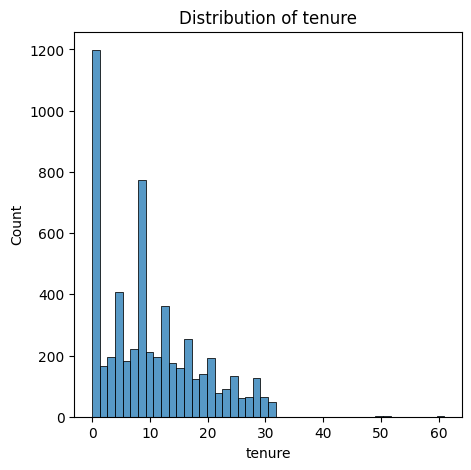

In [66]:
plt.figure(figsize=(5, 5))
sns.histplot(df['tenure'])
plt.title('Distribution of tenure')
plt.xlabel('tenure')
plt.show()

<Axes: xlabel='tenure', ylabel='Density'>

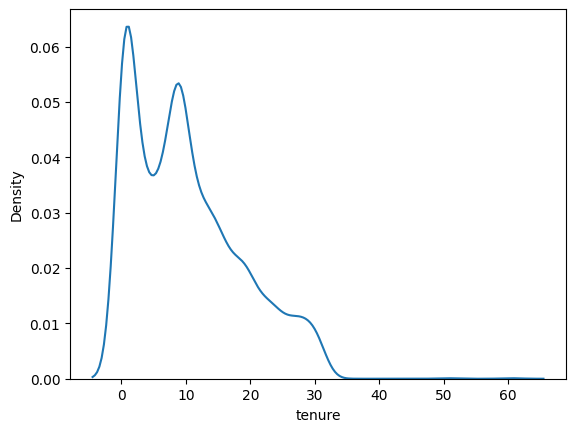

In [67]:
sns.kdeplot(df, x='tenure')